In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 업로드한 파일 목록 출력 (파일명이 정확히 업로드되었는지 확인)
print(uploaded.keys())


Saving Data_LSTM.csv to Data_LSTM.csv
dict_keys(['Data_LSTM.csv'])


In [ ]:
import pandas as pd

# 업로드된 CSV 파일을 읽어오기
data = pd.read_csv('/content/Data_LSTM.csv')

# 데이터 확인
print(data.head())


         Timestamp  Temperature   Humidity   Ammonia  Hydrogen_Sulfide
0  2024-04-01 0:00    16.354996  78.213492  7.522204        281.713039
1  2024-04-01 0:05    17.264424  73.440177  7.675337        290.379525
2  2024-04-01 0:10    16.822273  75.705689  7.618025        279.548717
3  2024-04-01 0:15    16.521323  79.103491  7.427863        279.672463
4  2024-04-01 0:20    17.138975  78.059722  7.664298        284.246365


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: nan - val_loss: nan
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: nan - val_loss: nan
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: nan - val_loss: nan
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: nan - val_loss: nan
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: nan - val_loss: nan
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: nan - val_loss: nan
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: nan - val_loss: nan
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: nan - val_loss: nan
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: nan - val_loss: nan
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: nan - val_loss: nan
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: nan - val_loss: nan
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: nan - val_loss: nan
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/st

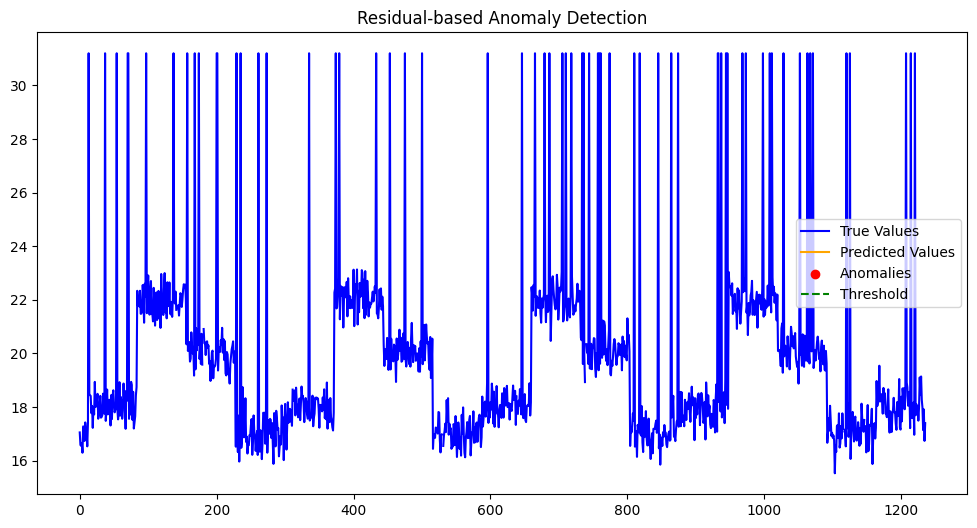

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
data = pd.read_csv('/content/Data_LSTM.csv')  # 업로드한 파일 경로로 수정

# 2. 필요한 열만 선택
data_to_use = data[['Temperature', 'Humidity', 'Ammonia', 'Hydrogen_Sulfide']].values

# 3. 시퀀스 길이 설정 (예: 60 타임스텝)
sequence_length = 60

# 4. 데이터셋 분할: 학습 70%, 테스트 15%, 평가 15%
train_data, temp_data = train_test_split(data_to_use, test_size=0.3, shuffle=False)
test_data, eval_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# 5. 데이터 전처리 (정규화 및 시퀀스 생성)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)  # features는 LSTM에 사용할 시계열 데이터

# 시퀀스 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # 타겟은 'Temperature' 값이라고 가정
    return np.array(X), np.array(y)

# 학습 데이터 시퀀스 생성
X_train, y_train = create_sequences(train_data, sequence_length)

# 테스트 데이터 시퀀스 생성
X_test, y_test = create_sequences(test_data, sequence_length)

# 평가 데이터 시퀀스 생성
X_eval, y_eval = create_sequences(eval_data, sequence_length)

# 6. LSTM 모델 설계
model = Sequential()

# 결측치 마스킹 (마스킹 값: -1)
model.add(Masking(mask_value=-1, input_shape=(X_train.shape[1], X_train.shape[2])))

# LSTM 레이어 추가
model.add(LSTM(50, return_sequences=False))  # 50개 유닛의 LSTM 레이어
model.add(Dense(1))  # 출력 레이어 (타겟 값은 1개의 숫자)

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# 8. 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 9. 잔차 계산 (실제값과 예측값의 차이)
residuals = y_test.flatten() - y_pred.flatten()

# 10. 임계값 설정 (평균 + 3 * 표준편차)
threshold = np.mean(residuals) + 3 * np.std(residuals)

# 11. 이상치 탐지
anomalies = np.abs(residuals) > threshold
anomaly_indices = np.where(anomalies)[0]

# 12. 잔차 기반 이상치 탐지 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test.flatten(), label='True Values', color='blue')
plt.plot(y_pred.flatten(), label='Predicted Values', color='orange')
plt.scatter(anomaly_indices, y_test.flatten()[anomaly_indices], color='red', label='Anomalies')
plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='green', linestyle='--')
plt.title('Residual-based Anomaly Detection')
plt.legend()
plt.show()

# 13. 이상치 데이터 출력
anomalies_info = pd.DataFrame({
    'Index': anomaly_indices,
    'Actual Value': y_test.flatten()[anomaly_indices],
    'Predicted Value': y_pred.flatten()[anomaly_indices],
    'Error': residuals[anomaly_indices]
})

print("Detected Anomalies:")
print(anomalies_info)
